Imagens para computador não são nada mais do que matrizes e tensores (matrizes 3D)(os fisicos e matematicos vão me perdoar por essa definição!). Para representar uma matriz no Python usamos de um `nested list` (uma lista dentro de outra).  

In [19]:
a = [[1,2,3], [4,5,6], [7,8,9]]

In [22]:
print(a)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


Prestem anteção nos 2 braketes (`[[`) no inicio da lista. Esse mostra que é um matrix. Agora como podemos acessar um elemento especifoco da matriz? Lembrando que uma matriz tem linha e coluna, primeiro temos que escolher a linha que o elemento fica. Como um exemplo vamos acessar o numero "4". Primeiro temos que pegar a segunda linha. O indice dessa linha é "1" (os indices começam do 0 no Python). 

In [23]:
a[1]

[4, 5, 6]

E na segunda etapa podemos pegar o "4"

In [24]:
a[1][0]

4

Para ter um tensor 3D seguimos o mesmo procedimento

In [31]:
b = [[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]], [[13,14,15],[16,17,18]]]

In [32]:
b[0]

[[1, 2, 3], [4, 5, 6]]

In [33]:
b[1]

[[7, 8, 9], [10, 11, 12]]

In [35]:
b[1][1]

[10, 11, 12]

# Numpy: Numeric Python

O Python tem um defeito muito grande, é lento! Comparando com C/C++ e Fortran, o Python é muito lento. Para resolver esse problema, existe um pacote que faz conexão entre C e Python, o querido Numpy! O Numpy é uma coleção de funções matematicas implementadas em C com uma interface no Python. Essas funções atuam sob `array`s multi-dimencionais. Esses `array`s são muito parecidos com as listas. Na verdade, a gente pode transformar qualquer lista em um `array` de Numpy e aproveitar o performance de Numpy. <br>
Para usar Numpy tem que o instalar primeiro. Quem tem Anaconda, não tem problema pois já está instalado. Mas quem tem Miniconda tem que instalar o Numpy primeiro

In [36]:
!conda install numpy

Solving environment: done

# All requested packages already installed.



In [2]:
import numpy as np

a = [1,2,3,4,5]
arr = np.array(a)

In [2]:
arr

array([1, 2, 3, 4, 5])

Quando temos um array podemos usar todo ferramental do Numpy. Por exemplo

In [3]:
arr.mean()

3.0

In [4]:
arr.argmax() #retorna o indice do maior elemento

4

In [5]:
arr.sum()

15

Vamos ver como ficam os array multi-dimencionais 

In [14]:
b = [[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[13,14,15,16],[17,18,19,20],[21,22,23,24]]]
arr1 = np.array(b)

In [15]:
b

[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
 [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]

Presetem atenção nos `[[[`. Isso siginica que o array tem 3D. A primeira dimensão é linha, segunda é a coluna e a terceira é a profundidade. ![numpy](./image/numpy.png)

Para ver a forma de um array usamos o metodo

In [16]:
arr1.shape

(2, 3, 4)

Então esse tensor é composto de uma matriz $2 \times 3$ que tem 3 camadas. As camadas são

In [17]:
arr1[0]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [18]:
arr1[0].shape

(3, 4)

In [19]:
arr1[1]

array([[13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24]])

In [20]:
arr1[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

Para escolher todos os elementos da primeira linha da segunda camada faremos

In [71]:
arr1[1][0]

array([7, 8, 9])

Agora vamos ver como podemos pegar um pedaço de um array (`slicing`). Esse é necessario para a gente puder pegar uma parte de uma imagem, por exemplo.

In [74]:
arr = np.array([1,2,3,4,5,6]);
arr

array([1, 2, 3, 4, 5, 6])

Para pegar os numeros "2 e 3"

In [75]:
arr[1:3]

array([2, 3])

Para pegar o ultimo elemento 

In [76]:
arr[-1]

6

E penultimo

In [77]:
arr[-2]

5

Para reverter os elementos

In [78]:
arr[::-1] # essa operação não é inplace, ou seja, não afeta o array original

array([6, 5, 4, 3, 2, 1])

## `broadcasting`

O numpy tem uma capacidade muito interessante que se chama `broadcasting`. Isso nos permite aplicar uma função em todos os elementos da um array diretamente, sem os chamar um por um 

In [79]:
np.sin(arr) # o resultado é em radiano

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ])

In [81]:
f = lambda x:x**2
f(arr)

array([ 1,  4,  9, 16, 25, 36])

## Opcional - Comparação de um `array` do Numpy com um `list` do Python

Já foi falado que o Numpy é muito mais rapido do que o Python Puro. Vamos ver isso com um teste. Vamos aplicar a função $\sin$ a uma lista com 10000000 de numeros inteiros (Python puro) e depois ao array dessa lista e comparamos o tempo de cada um. 

In [2]:
%%timeit
b = np.arange(0,10000000)
b1 = np.sin(b)

297 ms ± 36.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
import math

In [5]:
%%timeit
c1 = []
c = list(range(10000000))
for item in c:
    c1.append(math.sin(item))

2.88 s ± 26.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Conclusão:** Usem um `array` no lugar de um `list` sempre quando for possivel.

# Imagem como um tensor

O `matplotlib` é um dos principais pacotes do Python para visualização de dados e produzir graficos. Aqui vamos usar esse pacote para carregar e exibir uma foto no Python. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

O comando magico `%matplotlib inline` é para exibir as imagens e figuras dentro do jupyter notebook. Então fora do jupyter não tem utilidade. para carregar uma foto faremos o seguinte

In [8]:
img = plt.imread('./image/parrot.jpg')

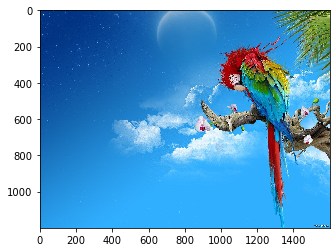

In [9]:
plt.imshow(img)

Agora vamos dar uma olhada na variavel `img`. 

In [61]:
print(img)

[[[  2  51 130]
  [  2  51 130]
  [  2  51 130]
  ...
  [153 176  98]
  [142 162  90]
  [130 150  79]]

 [[  2  51 130]
  [  2  51 130]
  [  2  51 130]
  ...
  [153 177  99]
  [134 156  83]
  [128 150  78]]

 [[  2  51 130]
  [  2  51 130]
  [  2  51 130]
  ...
  [120 147  66]
  [ 70  94  18]
  [ 58  82   8]]

 ...

 [[ 41 156 236]
  [ 41 156 236]
  [ 41 156 236]
  ...
  [ 44 171 248]
  [ 45 173 248]
  [ 48 176 249]]

 [[ 41 156 236]
  [ 41 156 236]
  [ 41 156 236]
  ...
  [ 47 173 247]
  [ 51 175 247]
  [ 51 175 247]]

 [[ 41 156 236]
  [ 41 156 236]
  [ 41 156 236]
  ...
  [ 57 181 253]
  [ 57 180 250]
  [ 51 174 244]]]


In [82]:
img.shape

(1200, 1600, 3)

Então, essa image é um tensor com tres camadas. Mas porque tres?!

## RGB

RGB (vermelho, verde e azul) refere-se a um sistema para representar as cores a serem usadas na tela do computador. Vermelho, verde e azul podem ser combinados em várias proporções para obter qualquer cor no espectro visível. Os níveis de R, G e B podem variar de 0 a 100% da intensidade total.![RGB](./image/RGB-color-model.jpg)

Então, uma imagem colorida tem tres camadas, a primeira é a cor vermelha (red), segunda verde (green) e a ultima é azul (blue). Os valores da cada cor varia entre 0 e 255. O valor 0 (por exemplo azul claro, quase branco) significa nenhuma intensidade e 255 significa o total (por exemplo azul escuro, quase preto). Agora vamos ver cada camada separadamente. Acamada 1 (indice 0) é 

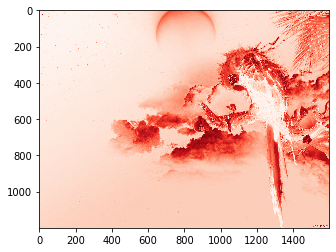

In [87]:
plt.imshow(img[:,:,0],cmap="Reds")

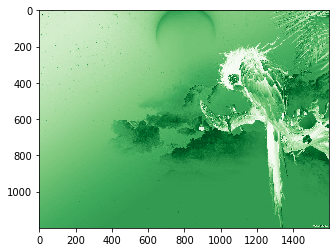

In [89]:
plt.imshow(img[:,:,1],cmap="Greens")

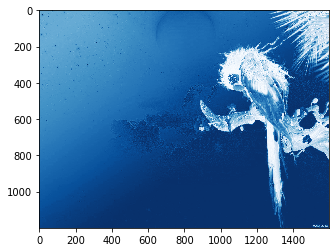

In [90]:
plt.imshow(img[:,:,2],cmap="Blues")

Olhem para o rabo do papagaio, na imagem original é totalmente vermelha. Isso siginifica que não tem as cores azul e verdes no meio. Realmente olhando para canal verde e azul vemos que o rabo é branco, ou seja, não tem dessas cores. 

# Cortar uma imagem

Cortar uma imagem nada é mais do que pegar uma parte do tensor da imagem. Vamos tentar para separar só o papagaio da imagem. Olhando para o resultado do `imshow` vemos que, ao longo do eixo vertical, fica entre linha 150 e 1200 e ao longo do eixo horizontal, o papagaio fica entre a coluna 900 e 1400. Então

In [91]:
papagaio = img[150:1200,900:1400, :]

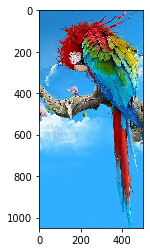

In [92]:
plt.imshow(papagaio)

**YOOHOO! Deu certo!**

# Imagem em torre cinza (Grayscale)

Para transformar uma imagem colorida em preto-branco temos que implementar a seguinte formula:
$$ 0.299 R + 0.587 G + 0.114 B $$

In [101]:
gray = (0.299* img[:,:,0] + 0.587*img[:,:,1] + 0.114 *img[:,:,2])

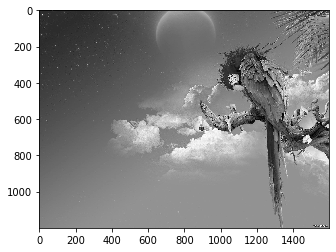

In [102]:
plt.imshow(gray, cmap='gray')

# Criar uma imagem Usando um `Array`!

## Tipo de dados

Antes de começar, vamos ver um detalhe importante sobre a forma que um computador guarda os numeros. Um numero pode ser inteiro ou float (tambem complexo, mas não vamos estudar os numeros complexos aqui). Os computadores, no nivel do hardware, só conhecem 0 e 1. Essa unidade fundamental da memoria se chama um *bit*. Então tudo deve ser traduzido em 0 e 1 (sistema binario). No cotidiano, nos somos acostumados com o sistema decimal, a unidade basica de numeros variam entre 0 e 9. Para traduzir um numero de sistema decimal para o binario utilizamos o seguinte procedimento (vamos usar o exemplo numero 17):

17/2 = 2*8 + 1

8/2 = 2*4 + 0

4/2 = 2*2 + 0

2 = 2*1 + 0

1 = 2*0 + 1

-> 13 = 10001

Então para guardar o numero 17, o computador precisa de 5 bits. Com 8 bits um computador consegue guardar um numero inteiro entre 0 e 255. Essa unidade de 8 bits que serve para um guardar um numero inteiro positivo se chama *uint8* (unsigned integer). Para ter numeros negativos (-255,255) temos que alocar mais memoria e usamos *int8*. Um *int16* consegue guardar um numero no intervalo (-32,768 to +32,767). Tem a mesma logica para os numeros *float*s. Por isso na hora de definir uma variavel, para manter a eficiencia, temos que definir o tipo de variavel. Para uma imagem vamos usar *uint8*. Az, vezes um numero não cabe em um tipo Vamos ver um exemplo

In [10]:
arr = np.array([-1,2,0,3],dtype = np.uint8)

In [11]:
arr

array([255,   2,   0,   3], dtype=uint8)

In [12]:
arr1 = np.array([-1,2,0,3],dtype = np.int8)

In [13]:
arr1

array([-1,  2,  0,  3], dtype=int8)

In [14]:
arr2 = np.array([-1,2,0,300],dtype = np.int8)

In [15]:
arr2

array([-1,  2,  0, 44], dtype=int8)

In [16]:
arr3 = np.array([-1,2,0,300],dtype = np.int16)

In [17]:
arr3

array([ -1,   2,   0, 300], dtype=int16)

## Um Array 3D como uma imagem

Como foi dito, uma imagem no formato RGB é um Array tridimensional (3D). Para ganhar experiencia, vamos tentar criar um array 3D no formato $5 \times 4 \times 3$. Lembrando o cubo acima e os eixos de um array, podemos dizer que esse array tem 5 camadas horizontain (eixo_0). Essas camadas são matrizes $4 \times 3$, (eixo_1 = 4 e eixo_2=3). Um exemplo pode ser 

In [4]:
b = [[[1,2,3],[4,5,6],[7,8,9],[10,11,12]],\
[[13,14,15],[16,17,18],[19,20,21],[22,23,24]],\
[[25,26,27],[28,29,30],[31,32,33],[34,35,36]],\
[[37,38,39],[40,41,42],[43,44,45],[46,47,48]],\
[[49,50,51],[52,53,54],[55,56,57],[58,59,60]]]

In [5]:
arr = np.array(b)

In [7]:
arr

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18],
        [19, 20, 21],
        [22, 23, 24]],

       [[25, 26, 27],
        [28, 29, 30],
        [31, 32, 33],
        [34, 35, 36]],

       [[37, 38, 39],
        [40, 41, 42],
        [43, 44, 45],
        [46, 47, 48]],

       [[49, 50, 51],
        [52, 53, 54],
        [55, 56, 57],
        [58, 59, 60]]])

In [6]:
arr.shape

(5, 4, 3)

Dá para ver que o eixo_0 tem 5 camadas

In [8]:
len(arr)

5

A primeira camada é 

In [9]:
arr[0]

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

E a ultima é 

In [10]:
arr[4]

array([[49, 50, 51],
       [52, 53, 54],
       [55, 56, 57],
       [58, 59, 60]])

Agora vamos ver como é a face desse array

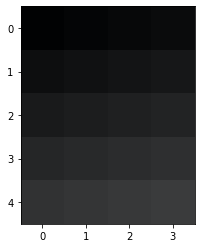

In [11]:
plt.imshow(arr)

O elemento max deste array é 60, então podemos multiplicar ele por 4 sem ultrapassar de 255

In [13]:
arr1 = (4*arr)

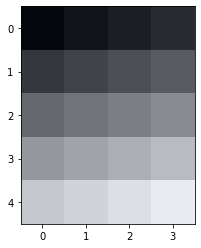

In [14]:
plt.imshow(arr1)

É um exemplo para ver que na medida que os numeros se aproximam a 255, temos cores mais claras. Agora vamos tentar criar uma imagem colorida. Para isso a cada canal de cor tem que ter escalas distinctas. Primeio criamos um array $5\times 4 \times 3$ com elementos zeros e depois alteramos esses elementos

In [15]:
arr2 = np.zeros((5,4,3))

In [16]:
arr2[:,:,0] = arr[:,:,0]*2 
arr2[:,:,1] = arr[:,:,1]*3  
arr2[:,:,2] = arr[:,:,2]*4 

Só para garantir vamos verificar se os elementos estão entre 0 e 255

In [18]:
print(arr2.max())
print(arr2.min())

240.0
2.0


Oops! Temos um problema! Os numeros são `floats` mas uma imagem só pode ter numero inteiro. Temos que transformar o tipo de elementos para `uint8`

In [20]:
arr2 = arr2.astype(np.uint8)

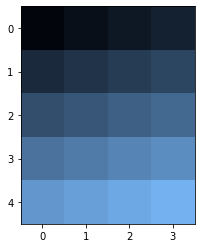

In [21]:
plt.imshow(arr2)

Pesando bem, faz sentido que a imagem acima tenha tonalidade azul. Nos multiplicamos o canal azul por um numero maior em comparação dos outros canais. Então o canal azul é mais intensa. Vamos criar outra imagem

In [27]:
arr3 = np.zeros((5,4,3))

arr3[:,:,0] = arr[:,:,0]*5 
arr3[:,:,1] = arr[:,:,1]*3  
arr3[:,:,2] = arr[:,:,2]*1 

In [23]:
print(arr3.max())
print(arr3.min())

290.0
3.0


Agora temos dois problemas! Os elementos são `float`s e temos elementos maior do que 255. Mudando o tipo de elementos podemos resolver o problema dos `float`s mas o elementos acima de 255 serão cortados. Assim 290 vai virar 290-255 = 35

In [28]:
arr3_1 = arr3.astype(np.uint8)

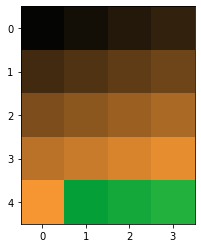

In [29]:
plt.imshow(arr3_1)

Os pixeis verdes são consequencias de cortar os numeros. Uma solução pode ser projetas os numeros acima de 255 para 255. Então 290 vai virar 255. 

In [30]:
arr3_2 = np.clip(arr3,0,255)

In [32]:
arr3_2 = arr3_2.astype(np.uint8)

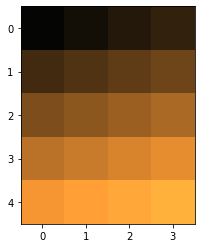

In [33]:
plt.imshow(arr3_2)

## Uma Imagem Aleatoria!

In [34]:
arr4 = np.random.rand(500,600,3)

In [35]:
arr4.shape

(500, 600, 3)

In [36]:
print(arr4.max())
print(arr4.min())

0.9999999274154237
4.581808376036278e-07


Os numeros são `float`s e são entre 0 e 1. Vamos multiplicar eles por 255 e depois transformamos em `uint8`

In [37]:
arr4 = (255*arr4).astype(np.uint8)

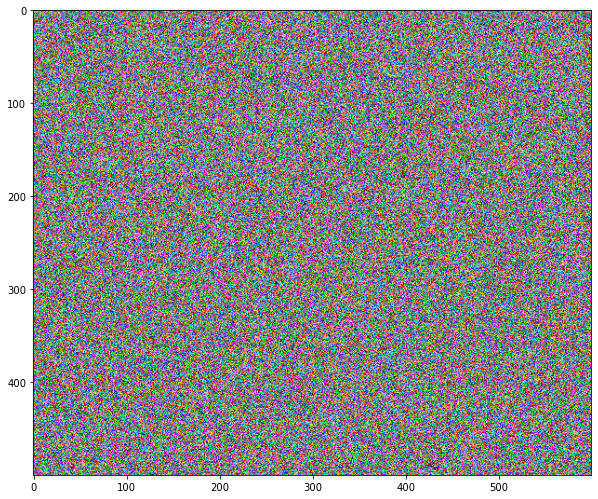

In [41]:
plt.figure(figsize=(10,12))
plt.imshow(arr4)

Só ruido!

Como a ultima brincadeira vamos criar uma imagem ($500\times 600 \times 3$) com tonalidade continua

In [40]:
arr5 = np.linspace(0,255,500*600*3)

Esse array é um array unidimensional

In [42]:
arr5.shape

(900000,)

In [43]:
arr5[0:30]

array([0.        , 0.00028333, 0.00056667, 0.00085   , 0.00113333,
       0.00141667, 0.0017    , 0.00198334, 0.00226667, 0.00255   ,
       0.00283334, 0.00311667, 0.0034    , 0.00368334, 0.00396667,
       0.00425   , 0.00453334, 0.00481667, 0.00510001, 0.00538334,
       0.00566667, 0.00595001, 0.00623334, 0.00651667, 0.00680001,
       0.00708334, 0.00736667, 0.00765001, 0.00793334, 0.00821668])

In [44]:
print(arr5.max())
print(arr5.min())

255.0
0.0


Mas podemos transformar ele no formato de uma foto

In [45]:
arr5 = arr5.reshape(500,600,3)

In [46]:
arr5 = arr5.astype(np.uint8)

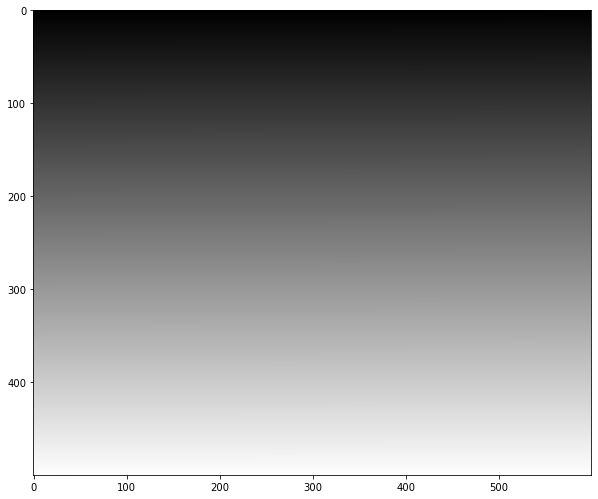

In [47]:
plt.figure(figsize=(10,12))
plt.imshow(arr5)

No canal vermelho temos 

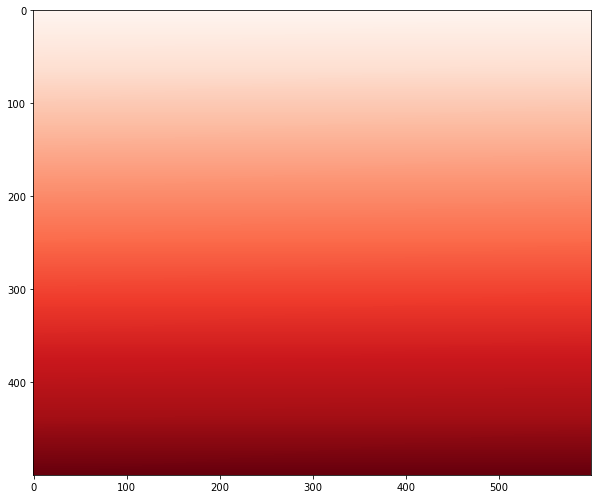

In [49]:
plt.figure(figsize=(10,12))
plt.imshow(arr5[:,:,0], cmap = 'Reds')

# Mudar Contraste de uma imagem

Para mudar a contraste de uma imagem temos que aumentar a intensidade das cores, lembrando que o maximo não pode ultrapassar de 255 e o minimo deve ser 0. 

Sabendo esse detalhe podemos começar mexer com a constraste de uma foto. Vamos definir a seguinte formula

In [19]:
def change_contrast2(image, factor):
    factor = float(factor)
    img1 = 128 + factor * image - factor * 128
    indx = np.where(img1<0)
    img1[indx] = 0
    indx = np.where(img1>255)
    img1[indx] = 255
    
    return img1.astype(np.uint8)
    #return np.clip(128 + factor * img - factor * 128, 0, 255).astype(np.uint8)


Vamos ver como funciona a função *np.where()*. Essa função retorna o indice dos elementos do array que satifazem a condição dada

In [25]:
arr = np.array([1,2,3,4,5])

In [26]:
np.where(arr<4)

(array([0, 1, 2]),)

Agora podemos mudar esses valores, se for o caso

In [27]:
arr[np.where(arr<4)] = 0

In [28]:
arr

array([0, 0, 0, 4, 5])

Vamos voltar a nossa função de contraste e aplicamos na foto do papagaio

In [20]:
img1 = change_contrast2(img, factor=2.0)

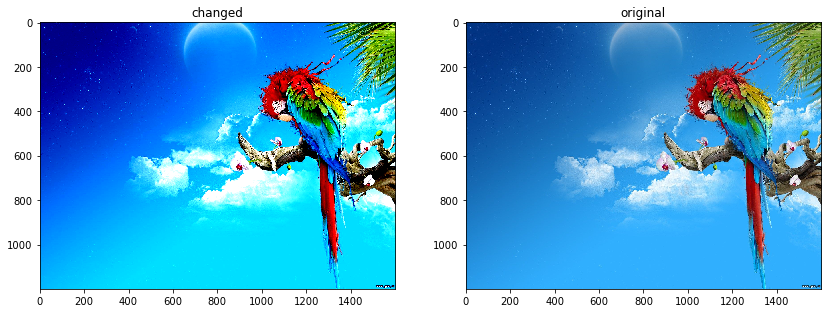

In [24]:
plt.figure(figsize=(14,10))

plt.subplot(121)
plt.title("changed")
plt.imshow(img1)

plt.subplot(122)
plt.title("original")
plt.imshow(img)

# Convoluções de Imagens e Kernels

No processamento de imagens, um kernel, matriz de convolução ou máscara é uma matriz pequena. É usado para desfoque, nitidez, moldar, detecção de bordas e muito mais. Isso é realizado fazendo uma convolução entre um kernel e uma imagem. A formula geral para fazer essa operação é 
$$
g(x,y)= \omega *f(x,y)=\sum_{dx=-a}^a{\sum_{dy=-b}^b{ \omega (dx,dy)f(x+dx,y+dy)}},
$$
onde $g(x,y)$ é a imagem filtrada, $f(x,y)$ é a imagem original, $\omega$ é o kernel. Mas não se assustem! Na pratica é muito mais facil de implementar. 

Modemos pensar em uma imagem como uma grande matriz e o kernel ou matriz convolucional como uma matriz pequena usada para desfoque, nitidez, detecção de borda e outras funções de processamento de imagem.

Essencialmente, esse pequeno kernel fica na parte superior da imagem grande e desliza da esquerda para a direita e de cima para baixo, aplicando uma operação matemática (isto é, uma convolução) em cada (x, y) coordenada da imagem original. Para ter uma ideia melhor vamos dar uma olhada no excelente site [setosa.io](https://setosa.io/ev/image-kernels/). ![](./image/convolutions_kernel_sliding.png)



Em cada coordenada (x, y) da imagem original, paramos e examinamos a vizinhança de pixels localizados no centro do kernel. Em seguida, pegamos essa vizinhança de pixels, os envolvemos com o kernel e obtemos um único valor de saída. Esse valor de saída é então armazenado na imagem de saída nas mesmas coordenadas (x, y) do centro do kernel.

Os kernels geralmente são matrizes $N\times N$ e $N$ é um numero impar.

No processamento de imagens, uma convolução requer três componentes:

- Uma imagem de entrada.
- Uma matriz do kernel que vamos aplicar à imagem de entrada.
- Uma imagem de saída para armazenar a saída da imagem de entrada convolvida com o kernel.

Convolução em si é realmente muito fácil. Tudo o que precisamos fazer é:

- Selecione uma coordenada (x, y) na imagem original.
- Coloque o centro do kernel nesta (x, y) coordenada.
- Pegue a multiplicação por elementos da região da imagem de entrada e do kernel e, em seguida, resuma os valores dessas operações de multiplicação em um único valor. A soma dessas multiplicações é chamada de saída do kernel.
- Use as mesmas coordenadas (x, y) da Etapa 1, mas desta vez, armazene a saída do kernel no mesmo local (x, y) da imagem de saída.

Vamos ver um exemplo.  ![](./image/convolutions_example.png) 

Agora vamos implementar um programa que implemente a convolução de uma imagem usando um kernel. O programa foi inspirado do excelente artigo [Convolutions with OpenCV and Python](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/)


In [54]:
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray
import numpy as np

Agora a implementação a função de convolução

In [111]:
def convolve(image, kernel):
    # primeiro transformamos a imagem colorida em torre-cinza
    image = rgb2gray(image)
    
    #Aqui criamos duas variaveis novas, altura e largura da imagem original
    (iH, iW) = image.shape[:2]
    #Aqui criamos duas variaveis novas, altura e largura do kernel
    (kH, kW) = kernel.shape[:2]

    # vamos aumentar a dimenção da imagem original, padding. Para que a imagem final tenha a mesma dimensão.
    pad = (kW - 1) // 2
    image_pad = np.zeros((iH + 2*pad,iW + 2*pad))
    image_pad[pad:-pad, pad:-pad] = image

    #aqui temos a nossa imagem final mas por enquanto com elementos zeros
    output = np.zeros((iH, iW), dtype="float32")

    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image_pad[y - pad:y + pad + 1, x - pad:x + pad + 1]
            
            # perform the actual convolution by taking the
            # element-wise multiplicate between the ROI and
            # the kernel, then summing the matrix
            k = (roi * kernel).sum()
        

            # store the convolved value in the output (x,y)-
            # coordinate of the output image
            output[y - pad, x - pad] = k

    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, out_range=np.uint8)

    

    # return the output image
    return output

A função `convolve` precisa de dois parametros, uma image e um kernel quadrado. Na primeira etapa transforma a imagem colorida em uma imagem preto-branco
```python
image = rgb2gray(image)

```

Antes de continuarmos, é importante entender que o processo de "deslizar" uma matriz convolucional através de uma imagem, aplicando a convolução e armazenando a saída diminuirá as dimensões espaciais da nossa imagem de saída.

Por que é isso?

Lembre-se de que “centralizamos” nossa computação em torno da coordenada central (x, y) da imagem de entrada sobre a qual o kernel está atualmente posicionado. Isso implica que **não existem pixels "centrais" para pixels que caem ao longo da borda da imagem**. A diminuição da dimensão espacial é simplesmente um efeito colateral da aplicação de convoluções às imagens. Às vezes, esse efeito é desejável e outras, não, simplesmente depende da sua aplicação.
```python
pad = (kW - 1) // 2
image_pad = np.zeros((iH+pad,iW+pad), dtype=np.uint8)
image_pad[pad:-pad, pad:-pad] = image
```
No codigo acima aumentamos as bordas da imagem original adicionando bordas (nos quatro lados da imagem) com elementos zeros. A lagrura dessa borda depende do tamanho do kernel

Depois vamos reservar um espaço na memoria para a imagem final. No inicio essa imagem só tem elemento zero e ao longo do processo a preenchemos com os valores calculados a partir da convolução da imagem original. 
```python
output = np.zeros((iH, iW), dtype="float32")
```

O proximo passo é andar ao longo da imagem original e para cada pixel, aplicar a convolução. Mas temos que prestar atenção que estamos falando da imagem original, não a versão que tem bordas extras. De qualquer forma, a imagem original está dentro das bordas da `imagem_pad`.
```python
for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			
			roi = image_pad[y - pad:y + pad + 1, x - pad:x + pad + 1]

			k = (roi * kernel).sum()

			output[y - pad, x - pad] = k
```
a variavel `k`, em cada loop, guarda o valor convolucionado de um pixel da imagem original e usando ela vamos preencher a imagem final.

No final, como a imagem final, pode ter valores fora do intervalo [0,255], escalamos os valores para esse intervalo e transformamos em `uint8`
```python
output = rescale_intensity(output, in_range=(0, 255))
output = (output * 255).astype("uint8")
```

O proximo passo seria definir alguns kernels para aplicarmos depois 

In [59]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

# construct the kernel bank, a list of kernels we're going
# to apply using our custom `convole` function 
kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY)
)

Agora podemos testar a nossa função aplicando kernels diferentes em uma imagem

In [60]:
img = plt.imread('./image/1.jpg')

[INFO] applying small_blur kernel


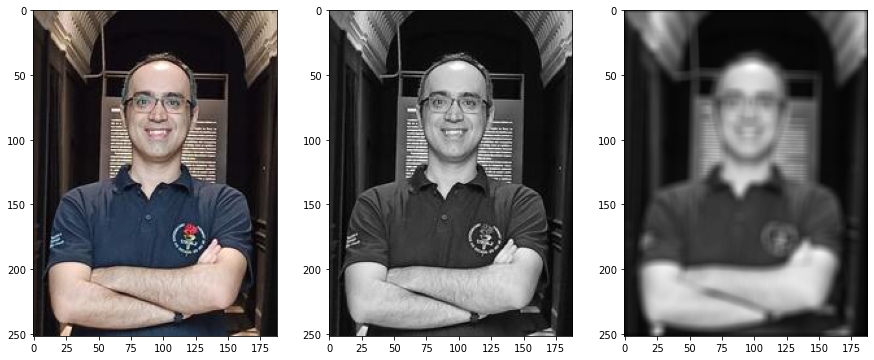

[INFO] applying large_blur kernel


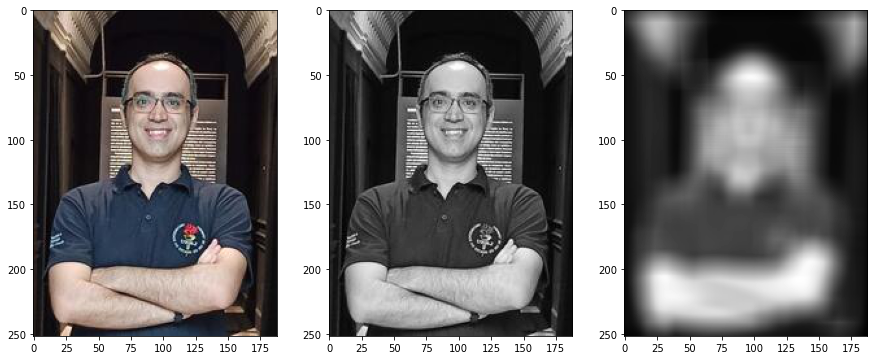

[INFO] applying sharpen kernel


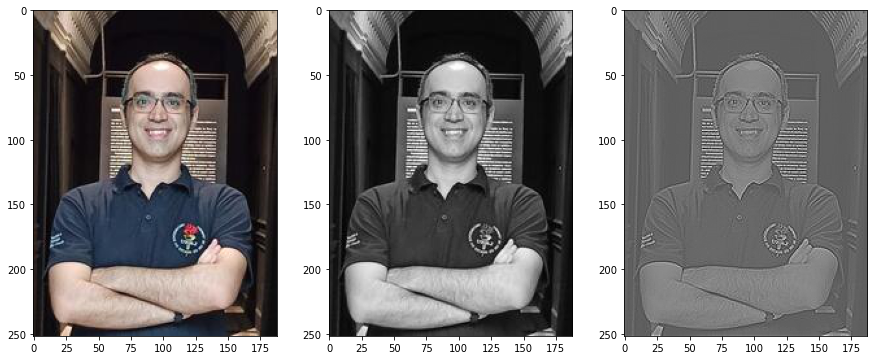

[INFO] applying laplacian kernel


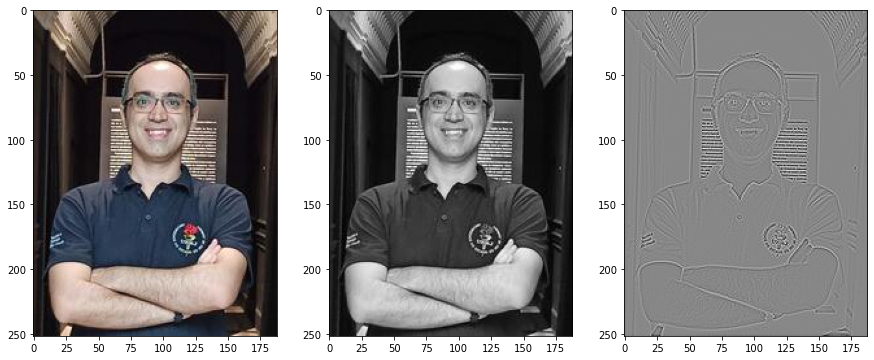

[INFO] applying sobel_x kernel


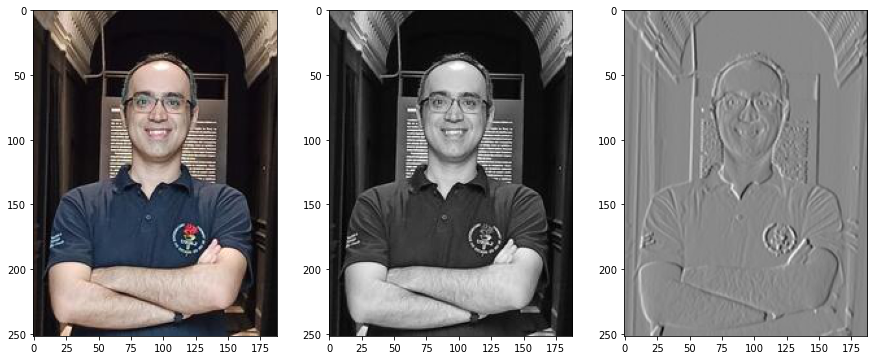

[INFO] applying sobel_y kernel


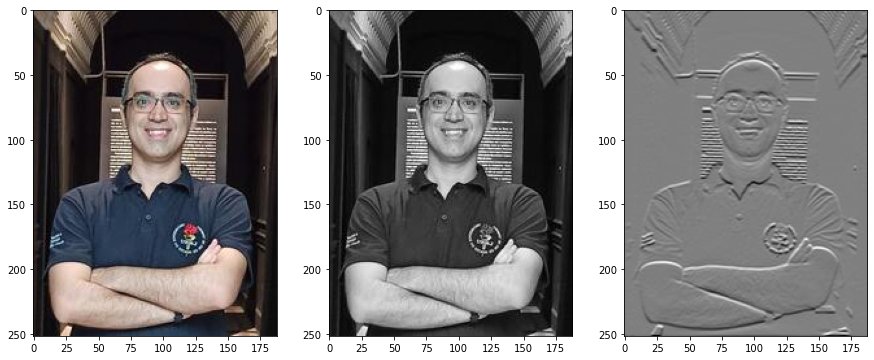

In [114]:
for (kernelName, kernel) in kernelBank:
    # apply the kernel to the grayscale image using
    # our custom `convole` function
    print(f"[INFO] applying {kernelName} kernel")
    convoleOutput = convolve(img, kernel)
    
    plt.figure(figsize=(15,6))
    plt.subplot(131)
    plt.imshow(img)
    
    plt.subplot(132)
    plt.imshow(rgb2gray(img), cmap='gray')
    
    plt.subplot(133)
    plt.imshow(convoleOutput, cmap='gray')
    plt.show()

Nesse programa, precisamos definir *manualmente* cada um de nossos kernels para aplicar várias operações, como suavização, nitidez e detecção de arestas.

Tudo bem e bom, mas e se houvesse uma maneira de *aprender* esses filtros? É possível definir um algoritmo de aprendizado de máquina que possa ver imagens e eventualmente aprender esses tipos de operadores?

De fato, existem - esses tipos de algoritmos são um subtipo de redes neurais chamadas redes neurais convolucionais (CNNs). Ao aplicar filtros convolucionais, funções de ativação não lineares, pool e retropropagação, as CNNs podem *aprender* filtros que podem detectar bordas e estruturas semelhantes a bolhas em camadas iniciais da rede - e então usar as bordas e estruturas como blocos de construção, eventualmente detectar objetos de nível superior (como rostos, gatos, cães, copos, etc.) nas camadas mais profundas da rede.![CNN](./image/cnn1.png)

# Algebra Linear Usando Numpy

O módulo Álgebra Linear do NumPy oferece vários métodos para aplicar álgebra linear em qualquer matriz numpy.
Pode-se encontrar:

- característica (rank), determinante, traço, etc. de uma matriz.
- autovalores de matrizes
- produtos matriciais e vetoriais (ponto, interno, externo, etc.), exponenciação da matriz
- resolver equações lineares ou tensores e muito mais!

A gente já viu que no pacote *Sympy* temos essas ferramentais tambem. O Sympy é para calculo sibmbolico, então se o problema é completamente é numerico é melhor usar do Numpy. 

In [29]:
import numpy as np
 
A = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])
 
# característica (rank) de uma matriz
print("Rank of A:", np.linalg.matrix_rank(A))
 
# Traço da matriz A A
print("\nTrace of A:", np.trace(A))
 
# Determinante de uma matriz
print("\nDeterminant of A:", np.linalg.det(A))
 
# Inverso da matriz A
print("\nInverse of A:\n", np.linalg.inv(A))
 
print("\nMatrix A raised to power 3:\n",
           np.linalg.matrix_power(A, 3))

Rank of A: 3

Trace of A: 11

Determinant of A: -306.0

Inverse of A:
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]

Matrix A raised to power 3:
 [[336 162 228]
 [406 162 469]
 [698 702 905]]


O produto matricial é 

In [44]:
B = np.array([[1, 1, 3,4],
              [5, 2, -2,-3],
              [-2, 5, 7,7]])

In [45]:
np.matmul(A,B)

array([[  9,  13,  23,  28],
       [-16,  25,  51,  57],
       [ 28,  53,  39,  33]])

O produto escalar, vetorial e exterior entre dois vetores são calculadas

In [46]:
a = [1,2,3]
b = [4,5,6]

In [47]:
np.inner(a,b)

32

In [49]:
np.cross(a,b)

array([-3,  6, -3])

In [48]:
np.outer(a,b)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

**numpy.linalg.solve()**: Resolve uma equação de matriz linear, ou sistema de equações escalares lineares. Calcule a solução "exata", x, da equação da matriz linear bem determinada, isto é, posição completa, Ax = b.
$$
\begin{cases}
x+3y+5z = 10 \\
2x+5y+z = 8 \\
2x+3y+8z = 3
\end{cases}
$$

In [50]:
A = np.array([[1, 3, 5], [2, 5, 1], [2,3,8]])

b = np.array([10,8,3])


In [51]:
np.linalg.solve(A, b)

array([ 1.66993464, -0.20261438,  0.18300654])

Para verificar

In [52]:
np.matmul(A, np.linalg.solve(A, b))

array([10.,  8.,  3.])

**numpy.linalg.eig(a)**: Esta função é usada para calcular os autovalores e autovetores corretos de uma matriz quadrada.

In [34]:
from numpy import linalg
 
# Criando uma array usando a função diag() 

a = np.diag((1, 2, 3))
 
print("Array é :",a)
 
# Calculando os autovalores 
c, d = linalg.eig(a)
 
print("Autovalores são :",c)
print("Autovetores são é :",d)

Array é : [[1 0 0]
 [0 2 0]
 [0 0 3]]
Autovalores são : [1. 2. 3.]
Autovetores são é : [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [41]:
np.matmul(a,d[1]) 

array([0., 2., 0.])

In [40]:
c[1]*d[1]

array([0., 2., 0.])

## Tkinter: Renderizando Imagens (Rendering Images)

Se você conseguiu acompanhar até aqui, adicionar imagens e ícones à GUI deve ser fácil. Tudo que precisamos fazer é usar de duas classes do pacote `PIL`, chamadas `Image` e `ImageTk`. Usando `Image.open(blah.jpg)` pegamos a imagem e guardamos em uma variavel, depois usando `ImageTk.PhotoImage()` transformamos em um formatio adequado para o Tkinter. Finalmente podemos usar essa imagem em um `Label`

Portanto, sem mais delongas, vamos escrever rapidamente um código para exibir uma imagem na GUI.

In [3]:
import tkinter

#aqui estamos chamando duas classes do pacote PIL
from PIL import Image, ImageTk

# vamos criar uma janela
window = tkinter.Tk()
window.title("GUI")

'''A fim de exibir uma imagem em um GUI, vamos utilizar o metodo "open()" da classe "Image" do pacote "PIL". 
Ele vai pegar uma imagem de um diretorio (um caminho na memoria do computador (HD)) e salva-la em uma variavel.
depois vamos usar "ImageTk.PhotoImage" para transformar a imagem em um formato adequado para Tkinter

'''
load = Image.open("1.jpg")
icon = ImageTk.PhotoImage(load)

#finalmente para exibir a imagem vamos usar o metodo 'Label' e passar a variavel da imagem como um parametro
label = tkinter.Label(window, image = icon)
label.pack()

window.mainloop()